In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt #for scatter
import random
import pandas as pd



Automatically created module for IPython interactive environment


In [2]:
!pip install yellowbrick

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

In [4]:
df = pd.read_csv('fifa20.csv')
data = pd.DataFrame()
data['overall']=df['overall']
data['wage_eur'] = df['wage_eur']
data

,overall,wage_eur
0,94,565000
1,93,405000
2,92,290000
3,91,125000
4,91,470000
5,91,370000
6,90,250000
7,90,200000
8,90,340000
9,90,240000


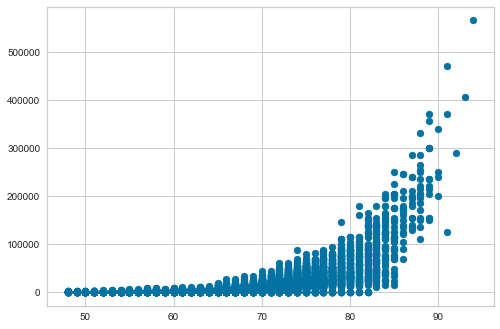

In [5]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], marker='o')
plt.show()

In [7]:
# inisiasi k centroid dari dataset X
def init_centroid(X,k):
    n_sample= X.shape[0]
    point = random.sample(range(0, n_sample), k)
    centroid=[]
    for i in range(k):
        centroid.append(X[point[i]][:])
        
    return np.array(centroid)

In [8]:
def euc_distance(mtxA, mtxB):
    A_square = np.reshape(np.sum(mtxA * mtxA, axis=1), (mtxA.shape[0], 1))
    B_square = np.reshape(np.sum(mtxB * mtxB, axis=1), (mtxB.shape[0]), 1)
    AB = mtxA @ mtxB.T
    return np.sqrt(-2 * AB + B_square + A_square)
    

In [9]:
def get_cluster(X, cent, distance_method):
    k = cent.shape[0]
    cluster ={}
    dist_matrix = distance_method(X, cent)    
    closest_cluster_ids = np.argmin(dist_matrix, axis=1)

    for i in range(k):
        cluster[i] = []
    for i, cluster_id in enumerate(closest_cluster_ids):
        cluster[cluster_id].append(X[i])
        
    return cluster
    

In [10]:
def cover_centroid(prev_cent, new_cent, dist_method, move_threshold):
    dist_prev_vs_new = dist_method(prev_cent, new_cent)
    covered_cent = np.max(dist_prev_vs_new.diagonal()) <= move_threshold
    
    return covered_cent

In [11]:
def kmeans(X, k, dist_method, move_threshold):
    new_cent = init_centroid(X=X, k=k)
    centroids_covered = False
    
    while not centroids_covered:
        prev_cent = new_cent
        clusters = get_cluster(X, prev_cent, dist_method)
        new_cent = np.array([np.mean(clusters[key], axis=0, dtype=X.dtype)
                                  for key in sorted(clusters.keys())])
        centroids_covered = cover_centroid(prev_cent, new_cent, dist_method, move_threshold)
    return new_cent

<function matplotlib.pyplot.show(*args, **kw)>

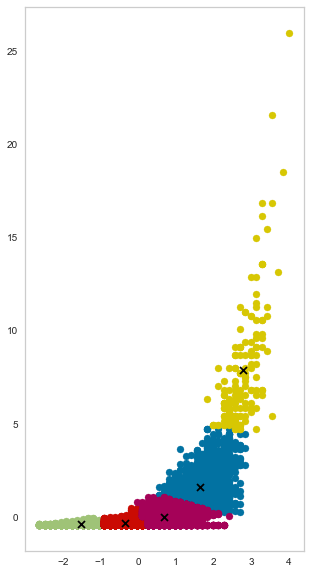

In [12]:

from sklearn.preprocessing import StandardScaler
dum = np.array(data)
scal = StandardScaler()
scal_x = scal.fit_transform(dum)
centroids = kmeans(scal_x, k=5, dist_method=euc_distance, move_threshold=0.0001)
clusters = get_cluster(scal_x, centroids, euc_distance)

plt.rcParams['figure.figsize'] = [5, 10]
for centroid, points in clusters.items():
    points = np.array(points)
    centroid = np.mean(points, axis=0)
    plt.scatter(points[:, 0], points[:, 1], marker='o')
    plt.grid()
    plt.scatter(centroid[0], centroid[1], marker='x', color="black")
plt.show    


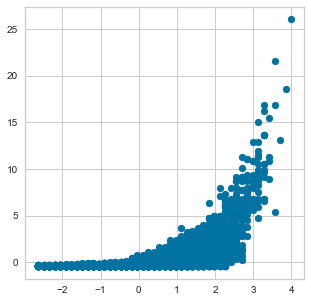

In [13]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.scatter(scal_x[:, 0], scal_x[:, 1], marker='o')
plt.show()

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002636FE81E48>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

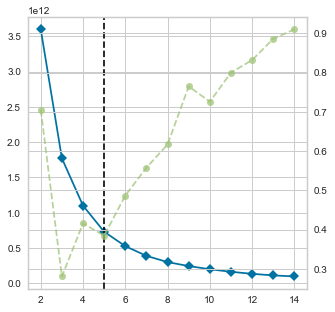

In [14]:
visualizer.fit(data)

In [12]:
points


array([[ 2.4108744 ,  0.07227052],
       [ 2.2669846 , -0.39608877],
       [ 2.2669846 , -0.39608877],
       ...,
       [ 0.10863766,  0.40012202],
       [ 0.10863766,  0.07227052],
       [-0.03525213,  0.82164538]])

In [14]:
centroids

array([[ 0.93841687,  0.17414534],
       [-1.30687528, -0.37083592],
       [-0.10002085, -0.29277272],
       [ 2.81355107,  8.34580235],
       [ 1.73598935,  2.03674216]])

In [15]:
clusters

{0: [array([2.69865399, 0.25961423]),
  array([2.55476419, 0.30645016]),
  array([2.4108744 , 0.40012202]),
  array([2.4108744 , 0.63430166]),
  array([2.4108744 , 0.07227052]),
  array([2.4108744 , 0.35328609]),
  array([2.4108744, 0.5406298]),
  array([2.2669846 , 0.58746573]),
  array([2.2669846 , 0.40012202]),
  array([2.2669846, 0.5406298]),
  array([2.2669846 , 0.63430166]),
  array([2.2669846 , 0.25961423]),
  array([2.2669846 , 0.68113759]),
  array([ 2.2669846 , -0.39608877]),
  array([ 2.2669846 , -0.39608877]),
  array([ 2.2669846 , -0.39608877]),
  array([2.2669846 , 0.63430166]),
  array([ 2.2669846 , -0.39608877]),
  array([2.2669846 , 0.49379388]),
  array([ 2.2669846, -0.4429247]),
  array([ 2.2669846, -0.4429247]),
  array([2.12309481, 0.68113759]),
  array([2.12309481, 0.2127783 ]),
  array([2.12309481, 0.44695795]),
  array([2.12309481, 0.5406298 ]),
  array([2.12309481, 0.40012202]),
  array([2.12309481, 0.16594238]),
  array([2.12309481, 0.72797352]),
  array([2.12

In [16]:
data2=pd.DataFrame()

In [17]:
data2['release_clause_eur']=df['release_clause_eur']
data2['potential']=df['potential']

In [18]:
data2

,release_clause_eur,potential
0,195800000.0,94
1,96500000.0,93
2,195200000.0,92
3,164700000.0,93
4,184500000.0,91
5,166500000.0,91
6,143400000.0,93
7,150200000.0,91
8,92300000.0,90
9,148900000.0,90


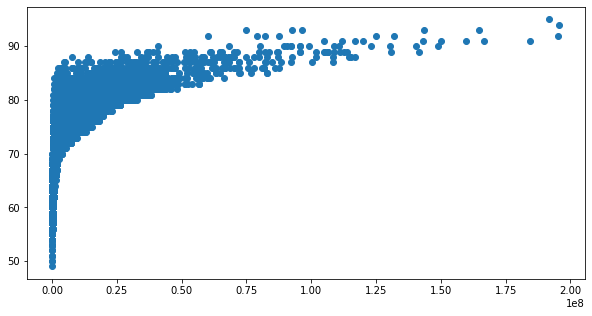

In [30]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(data2.iloc[:, 0], data2.iloc[:, 1], marker='o')
plt.show()

In [22]:
scal_data2 = data2


In [23]:
scal_data2.shape

(18278, 2)

In [24]:
scal_data2=scal_data2.dropna()

In [25]:
scal_data2.shape

(16980, 2)

In [26]:
scal_data2 = scal.fit_transform(scal_data2)

In [27]:
scal_data2

array([[17.32226896,  3.66871288],
       [ 8.31929729,  3.50624539],
       [17.26787034,  3.34377791],
       ...,
       [-0.42328631, -2.50505149],
       [-0.42346764, -2.50505149],
       [-0.42346764, -2.82998645]])

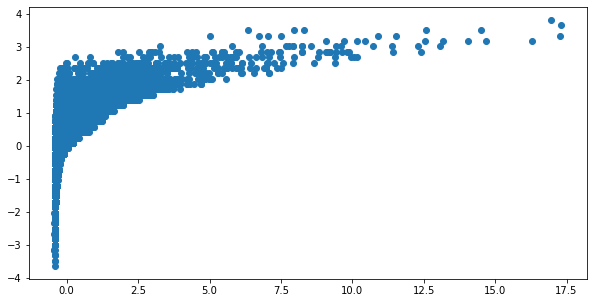

In [31]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(scal_data2[:, 0], scal_data2[:, 1], marker='o')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

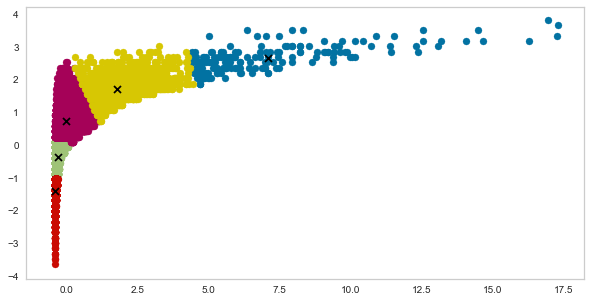

In [35]:
centroids = kmeans(scal_data2, k=5, dist_method=euc_distance, move_threshold=0.0001)
clusters = get_cluster(scal_data2, centroids, euc_distance)

plt.rcParams['figure.figsize'] = [10, 5]
for centroid, points in clusters.items():
    points = np.array(points)
    centroid = np.mean(points, axis=0)
    plt.scatter(points[:, 0], points[:, 1], marker='o')
    plt.grid()
    plt.scatter(centroid[0], centroid[1], marker='x', color="black")
plt.show 

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001D299096400>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

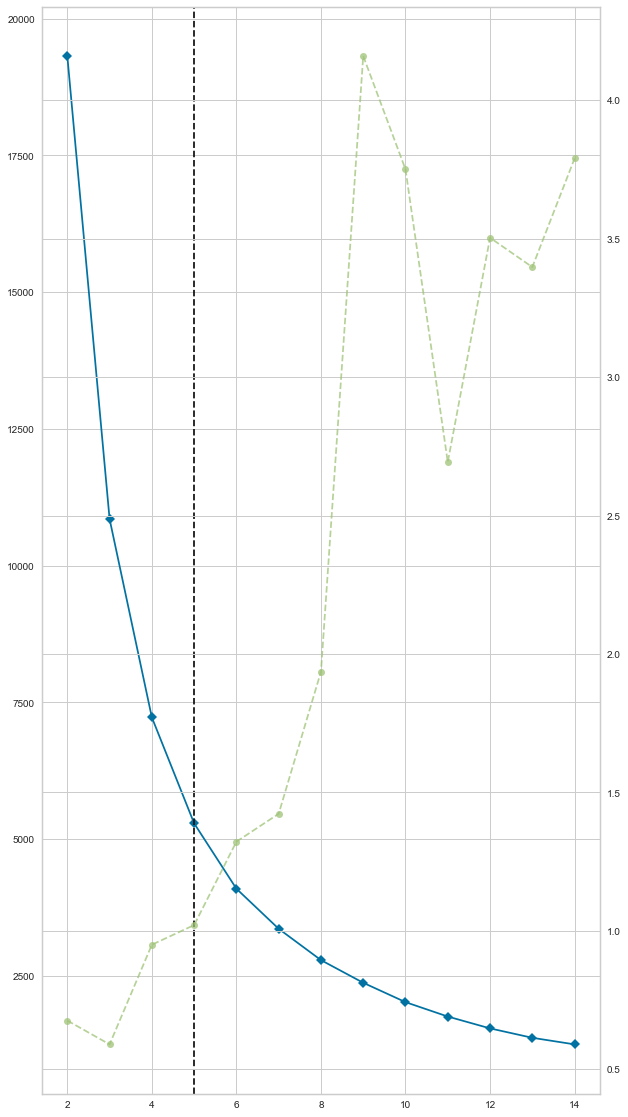

In [33]:
vis = KElbowVisualizer(model, k=(2,15))
vis.fit(scal_data2)